<a href="https://colab.research.google.com/github/ajaypr55/kaggle/blob/master/humpback-whale-identification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"ajay88","key":"e59115f39668b085910a90197e69599f"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Dec 28 12:08 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!rm -r data

In [10]:
""# List available datasets.
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
spscientist/students-performance-in-exams                     Students Performance in Exams                         8KB  2018-11-09 18:25:25           8453  
mehdidag/black-friday                                         Black Friday                                          5MB  2018-07-25 20:49:48          23323  
szamil/who-suicide-statistics                                 WHO Suicide Statistics                              307KB  2018-08-29 21:23:11           6059  
lava18/google-play-store-apps                                 Google Play Store Apps                                2MB  2018-09-18 20:49:49          28609  
iarunava/happy-house-dataset                        

In [11]:
!ls

 adc.json	     'kaggle (1).json'	 kaggle.json   model
 bounding_boxes.csv  'kaggle (2).json'	 log	       sample_data


In [12]:
# Copy the stackoverflow data set locally.
!kaggle competitions download -p data/ humpback-whale-identification

  0% 0.00/498k [00:00<?, ?B/s]
100% 498k/498k [00:00<00:00, 32.4MB/s]
  0% 0.00/594k [00:00<?, ?B/s]
100% 594k/594k [00:00<00:00, 35.6MB/s]
100% 1.35G/1.35G [00:12<00:00, 101MB/s]
100% 1.35G/1.35G [00:12<00:00, 116MB/s]
100% 4.14G/4.16G [01:13<00:00, 54.3MB/s]
100% 4.16G/4.16G [01:14<00:00, 60.3MB/s]


In [13]:
!ls

 adc.json	      data		'kaggle (2).json'   log     sample_data
 bounding_boxes.csv  'kaggle (1).json'	 kaggle.json	    model


In [0]:
!mkdir data/train
!mkdir data/test

In [0]:
!cp data/train.zip data/train/
!cp data/test.zip data/test/

In [0]:
!cd data/train && unzip -o -q train.zip && cd ..
!cd data/test && unzip -o -q test.zip && cd ..

In [0]:
!rm data/train/train.zip
!rm data/test/test.zip

In [0]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [32]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [0]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("data/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [0]:
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [22]:
X = prepareImages(train_df, train_df.shape[0], "train")
X /= 255

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg

In [35]:
y, label_encoder = prepare_labels(train_df['Id'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
y.shape

(25361, 5005)

In [19]:
model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3), name='avg_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))
model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 94, 94, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 94, 94, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 47, 47, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 45, 45, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 45, 45, 64)        0         
_________________________________________________________________
avg_pool (AveragePooling2D)  (None, 15, 15, 64)        0         
__________

In [0]:
!mkdir training_1


In [0]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
import tensorflow as tf

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

In [28]:
import gc
history = model.fit(X, y, epochs=100, batch_size=100,callbacks = [cp_callback])
gc.collect()

Epoch 1/100
25361/25361 [==============================] - 31s 1ms/step - loss: 6.2240 - acc: 0.3794

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/100
25361/25361 [==============================] - 27s 1ms/step - loss: 5.9662 - acc: 0.3811

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/100
25361/25361 [==============================] - 27s 1ms/step - loss: 5.8351 - acc: 0.3811

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/100
25361/25361 [==============================] - 27s 1ms/step - loss: 5.7532 - acc: 0.3811

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/100
25361/25361 [==============================] - 27s 1ms/step - loss: 5.7205 - acc: 0.3811

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/100
25361/25361 [==============================] - 27s 1ms/step - loss: 5.6964 - acc: 0.3811

Epoch 00006: saving model to training_1/cp.ckpt
Epoch 7/100
25361/25361 [==============================] - 27s 1ms/step - loss: 5.6681 - acc: 0.3811

0

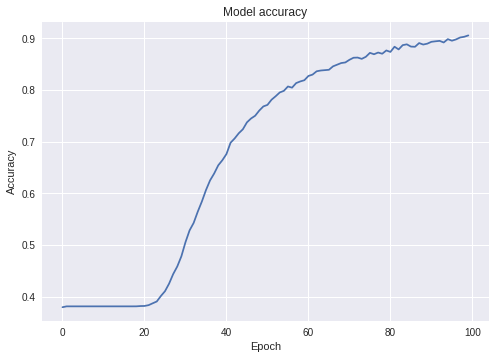

In [29]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [0]:
checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)

In [21]:
test = os.listdir("data/test/")
print(len(test))

7960


In [0]:
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = ''

In [23]:
X_Test = prepareImages(test_df, test_df.shape[0], "test")
X_Test /= 255

Preparing images
Processing image:  1 ,  f34be206d.jpg
Processing image:  501 ,  9d91ee409.jpg
Processing image:  1001 ,  ab3b9b4d0.jpg
Processing image:  1501 ,  cc9183037.jpg
Processing image:  2001 ,  759493d25.jpg
Processing image:  2501 ,  3d1d7b0e3.jpg
Processing image:  3001 ,  2c4035b6b.jpg
Processing image:  3501 ,  089ea7ad4.jpg
Processing image:  4001 ,  f29b10677.jpg
Processing image:  4501 ,  ef535e775.jpg
Processing image:  5001 ,  d4162ccc2.jpg
Processing image:  5501 ,  3f39da55c.jpg
Processing image:  6001 ,  07f73b14c.jpg
Processing image:  6501 ,  f3d299bf1.jpg
Processing image:  7001 ,  75d43877f.jpg
Processing image:  7501 ,  18c1e0336.jpg


In [24]:
predictions = model.predict(np.array(X_Test), verbose=1)


7960/7960 [==============================] - 7s 877us/step


In [0]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [38]:
print(test_df.head(10))
test_df.to_csv('submission.csv', index=False)

           Image                                                 Id
0  f34be206d.jpg  new_whale w_c6b4d61 w_700ebb4 w_9c506f6 w_e1ffbe2
1  24e2e1bb6.jpg  new_whale w_23a388d w_c6b4d61 w_0369a5c w_08630fd
2  6c40e9463.jpg  new_whale w_51e7506 w_cd4cb49 w_03670aa w_343f088
3  a61f6c50c.jpg  new_whale w_0ee7878 w_eba33fb w_01cbbbd w_5d5c6a6
4  5628e59a9.jpg  new_whale w_d8cb231 w_3de579a w_aaf3463 w_deda5f7
5  d7b4d79f4.jpg  new_whale w_3de579a w_bc285a6 w_c058057 w_985d205
6  4774d682f.jpg  new_whale w_fd906cc w_0135f5f w_edce644 w_2b069ba
7  507683be4.jpg  new_whale w_3eae264 w_27597ff w_26c0ffd w_564a34b
8  95b9e0e14.jpg  new_whale w_e906edd w_700ebb4 w_778e474 w_9d86594
9  8392ed906.jpg  new_whale w_066ddc5 w_6ed6320 w_e13f4e8 w_7b098ce


In [0]:
from google.colab import files

files.download('submission.csv')

In [4]:
!ls training_1/

cp.ckpt
